In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Define the new path
path = r'C:\Users\User\Documents\Career Foundry\Data Analytics Immersion\Data Immersion 6. Advanced Analytics & Dashboard Design'

In [5]:
# Import the excel file
df = pd.read_excel(os.path.join(path, '6.1', 'flavors_of_cacao_updated.xlsx'))

# Display the first few rows to check
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,0.71,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
1,15,Green & Black's (ICAM),U.K.,2006,Blend,Dark,0.70,"5- B,S,C,V,L","mildly rich, basic, roasty",2.50
2,15,Guittard,U.S.A.,2006,Colombia,Chucuri,0.65,"5- B,S,C,V,L","creamy, sweet, floral, vanilla",3.00
3,15,Neuhaus (Callebaut),Belgium,2006,Sao Tome,Sao Tome,0.75,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
4,15,Neuhaus (Callebaut),Belgium,2006,Blend,West Africa,0.73,"5- B,S,C,V,L","non descript, poor aftertaste",2.00


In [6]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2693 non-null   int64  
 1   Company (Manufacturer)            2693 non-null   object 
 2   Company Location                  2693 non-null   object 
 3   Review Date                       2693 non-null   int64  
 4   Country of Bean Origin            2693 non-null   object 
 5   Specific Bean Origin or Bar Name  2693 non-null   object 
 6   Cocoa Percent                     2693 non-null   float64
 7   Ingredients                       2606 non-null   object 
 8   Most Memorable Characteristics    2693 non-null   object 
 9   Rating                            2693 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 210.5+ KB


In [7]:
print(df.columns)

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')


In [8]:
# Remove the bracket in the column names
df.columns = df.columns.str.replace(r"[()]", "", regex=True)

In [9]:
print(df.columns)

Index(['REF', 'Company Manufacturer', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')


In [10]:
# Ensure column names are standardized
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [11]:
# Rename columns
df = df.rename(columns={
    "company_manufacturer": "company_name",
    "specific_bean_origin_or_bar_name": "bean_origin_or_bar",
    "most_memorable_characteristics": "memorable_characteristics"
})

In [12]:
print(df.columns)

Index(['ref', 'company_name', 'company_location', 'review_date',
       'country_of_bean_origin', 'bean_origin_or_bar', 'cocoa_percent',
       'ingredients', 'memorable_characteristics', 'rating'],
      dtype='object')


In [13]:
# Based on the results above, there are 87 missing values in the Ingredients column. Fill these missing values with "Unknown."
df['ingredients'] = df['ingredients'].fillna("Unknown")

In [14]:
# Check for the missing values in the ingredients
df['ingredients'].isnull().sum()

0

In [15]:
# Check if "Unkown" filled properly
df['ingredients'].value_counts()

ingredients
3- B,S,C          1100
2- B,S             768
4- B,S,C,L         296
5- B,S,C,V,L       184
4- B,S,C,V         141
Unknown             87
2- B,S*             31
4- B,S*,C,Sa        20
3- B,S*,C           13
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,C,Sa          5
4- B,S,V,L           5
6-B,S,C,V,L,Sa       4
4- B,S*,V,L          3
3- B,S,V             3
4- B,S*,C,L          2
2- B,C               1
5- B,S,C,L,Sa        1
3- B,S*,Sa           1
3- B,S, L            1
Name: count, dtype: int64

In [16]:
# Remove periods from country names
df['company_location'] = df['company_location'].astype(str).str.replace('.', '', regex=True).str.strip()
df['country_of_bean_origin'] = df['country_of_bean_origin'].astype(str).str.replace('.', '', regex=True).str.strip()

In [17]:
# Check the result
print(df[['company_location', 'country_of_bean_origin']].head(10))

  company_location country_of_bean_origin
0                                        
1                                        
2                                        
3                                        
4                                        
5                                        
6                                        
7                                        
8                                        
9                                        


In [18]:
# Reload only the original company_location and country_of_bean_origin columns
df_original = pd.read_excel(os.path.join(path, '6.1', 'flavors_of_cacao_updated.xlsx'), usecols=['Company Location', 'Country of Bean Origin'])

# Restore the columns
df['company_location'] = df_original['Company Location']
df['country_of_bean_origin'] = df_original['Country of Bean Origin']

In [19]:
# Try to remove the periods again
df['company_location'] = df['company_location'].astype(str).str.replace(r'\.', '', regex=True).str.strip()
df['country_of_bean_origin'] = df['country_of_bean_origin'].astype(str).str.replace(r'\.', '', regex=True).str.strip()

In [20]:
# Check again
print(df[['company_location', 'country_of_bean_origin']].head(10))
print(df['company_location'].unique())  # Check unique country names
print(df['country_of_bean_origin'].unique())  # Ensure periods are gone

  company_location country_of_bean_origin
0              USA                  Ghana
1               UK                  Blend
2              USA               Colombia
3          Belgium               Sao Tome
4          Belgium                  Blend
5              USA                  Blend
6              USA                  Blend
7           France                  Blend
8           France     Dominican Republic
9           France             Madagascar
['USA' 'UK' 'Belgium' 'France' 'Venezuela' 'Colombia' 'Switzerland'
 'Italy' 'Spain' 'Ecuador' 'Germany' 'Madagascar' 'Sao Tome & Principe'
 'Grenada' 'Bolivia' 'Argentina' 'Mexico' 'Canada' 'Guatemala' 'Israel'
 'Austria' 'Peru' 'Brazil' 'Denmark' 'Nicaragua' 'Ghana' 'Australia'
 'Fiji' 'Hungary' 'New Zealand' 'Vietnam' 'Costa Rica' 'Lithuania'
 'Poland' 'Scotland' 'Wales' 'Puerto Rico' 'Dominican Republic'
 'Philippines' 'St Lucia' 'Martinique' 'Ireland' 'Finland' 'Iceland'
 'Sweden' 'South Africa' 'Honduras' 'Japan' 'Netherlands'

In [21]:
# Replace non-country values
df['country_of_bean_origin'] = df['country_of_bean_origin'].replace({
    'Blend': 'Multiple Countries',
    'Sulawesi': 'Indonesia',
    'Sumatra': 'Indonesia',
    'Bali': 'Indonesia',
    'Principe': 'Sao Tome & Principe',
    'Tobago': 'Trinidad & Tobago',
    'France (Reunion)': 'Reunion'
})

In [22]:
# Verify the fix
print(df['country_of_bean_origin'].unique())

['Ghana' 'Multiple Countries' 'Colombia' 'Sao Tome' 'Dominican Republic'
 'Madagascar' 'Papua New Guinea' 'Venezuela' 'USA' 'Jamaica' 'Vanuatu'
 'Ecuador' 'Bolivia' 'Trinidad' 'Sri Lanka' 'Mexico' 'Peru' 'Indonesia'
 'Cuba' 'Brazil' 'Grenada' 'Costa Rica' 'Ivory Coast' 'Panama' 'St Lucia'
 'Nicaragua' 'Tanzania' 'Uganda' 'Congo' 'Philippines' 'Guatemala'
 'Vietnam' 'Nigeria' 'Belize' 'Honduras' 'Haiti' 'Fiji' 'India'
 'Sao Tome & Principe' 'Australia' 'Trinidad & Tobago' 'Liberia' 'Burma'
 'Gabon' 'Puerto Rico' 'Martinique' 'El Salvador' 'Cameroon' 'Togo'
 'Malaysia' 'Solomon Islands' 'Samoa' 'Suriname' 'Taiwan' 'Sierra Leone'
 'Thailand' 'DR Congo' 'StVincent-Grenadines' 'China' 'Reunion']


In [23]:
# Check data types
print(df.dtypes)

ref                            int64
company_name                  object
company_location              object
review_date                    int64
country_of_bean_origin        object
bean_origin_or_bar            object
cocoa_percent                float64
ingredients                   object
memorable_characteristics     object
rating                       float64
dtype: object


In [24]:
# Convert review_date into datetime64
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y')

In [25]:
# Check for duplicates
df.duplicated().sum()

0

In [26]:
# Basic descriptive analysis
df.describe()

,ref,review_date,cocoa_percent,rating
count,2693.000000,2693,2693.000000,2693.000000
mean,1514.082807,2014-11-15 01:26:37.474935040,0.715964,3.197828
min,5.000000,2006-01-01 00:00:00,0.420000,1.000000
25%,849.000000,2012-01-01 00:00:00,0.700000,3.000000
50%,1526.000000,2015-01-01 00:00:00,0.700000,3.250000
75%,2202.000000,2018-01-01 00:00:00,0.740000,3.500000
max,2876.000000,2023-01-01 00:00:00,1.000000,4.000000
std,804.025376,NaN,0.055130,0.440790


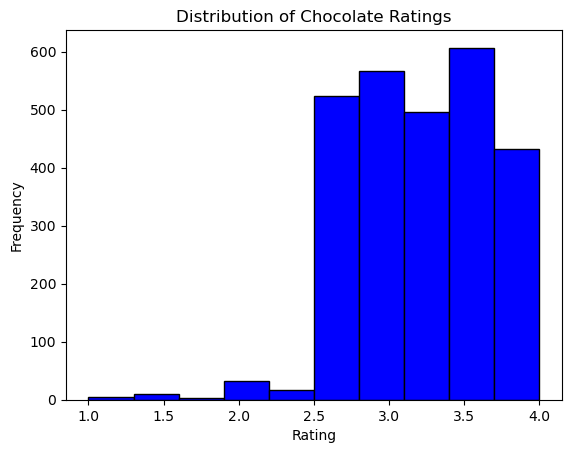

In [27]:
# Create histogram for rating column
plt.hist(df['rating'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Chocolate Ratings")
plt.show
# Save the figure
plt.savefig("chocolate_ratings_histogram.png", dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

In [28]:
# Export the cleaned file
df.to_excel(os.path.join(path, '6.2', 'flavors_of_cacao_cleaned.xlsx'), index=False)